***Initialization***

In [585]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [599]:
x, y = load_iris(return_X_y=True)

In [600]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

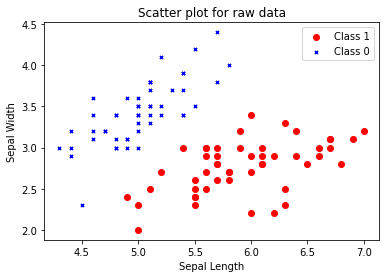

In [588]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    i , j = (y==1).reshape(100,1) , (y==0).reshape(100,1)
    plt.scatter(x[i[:,0],0],x[i[:,0],1],c="r")
    plt.scatter(x[j[:,0],0],x[j[:,0],1], c="b",marker='x',s=10)
    plt.title("Scatter plot for raw data")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend(["Class 1","Class 0"],loc=0)


    # f1 = plt.scatter(x[:,0],x[:,1], c=y)
    # f2 = plt.scatter(x[:,0],x[:,1], c=y)
    # plt.legend((f1,f2),('class 1','class 2'))    

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()
draw_data(x,y)

**Sigmoid function**
________________

In [590]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of this. Without spliting, you can just report the accuracy on training dataset. **

In [591]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    
    z = np.dot(theta, X.T)
    s = 1/(1+np.exp(-(z)))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s


**Cost function**
____________

In [592]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    y1 = sigmoid(theta,X)
    co = -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co



**Calculate gradients**
________________

In [593]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    grad = cost(theta, X, y)
    m = len(X)
    h = sigmoid(theta, X)
    grad = grad - (1/m) * ((y-h) @ X)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad


**Predicting**
________________

In [594]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    h1 = []
    h = sigmoid(theta, X)
    for i in h:
        if i>=0.5:
            h1.append(1)
        else:
            h1.append(0)

    predict_labels = h1
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels



**Calculate accuracy**
________________

In [595]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    accuracy = 0
    for i in range(0, len(predictions)):
        if predictions[i] == y[i]:
            accuracy += 1
    
    accuracy_score = accuracy/len(y)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [596]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
#print(result)
final_theta = result[0]
#print(final_theta)
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.16593157573967582
accuracy is 0.96


**Decsion boudary** 

In [597]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    # plot_x = [np.min(x[:,0]-1), np.max(x[:,1]+2)]
    plot_x = [2.0,8.0]
    plot_y = -1/final_theta[2]*(final_theta[0] 
           + np.dot(final_theta[1],plot_x))
    

    i , j = (y==1).reshape(100,1) , (y==0).reshape(100,1)
    plt.scatter(x[i[:,0],0],x[i[:,0],1],c="r")
    plt.scatter(x[j[:,0],0],x[j[:,0],1], c="b",marker='x',s=10)
    plt.title("Scatter plot for raw data")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend(["Class 1","Class 0"],loc=0)

    decision_boun = plt.plot(plot_x, plot_y)    

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

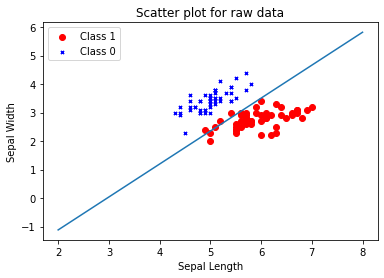

In [601]:
draw_decision_boudary(final_theta,x,y)